In [68]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

In [2]:
calender = pd.read_csv('m5-forecasting-accuracy/calendar.csv', parse_dates=['date'])
print("Calender Sample")
calender.head()

Calender Sample


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [4]:
for (name, data) in calender.iteritems():
    print('Missing Values in Column ', name,": ", data.isnull().values.any())

Missing Values in Column  date :  False
Missing Values in Column  wm_yr_wk :  False
Missing Values in Column  weekday :  False
Missing Values in Column  wday :  False
Missing Values in Column  month :  False
Missing Values in Column  year :  False
Missing Values in Column  d :  False
Missing Values in Column  event_name_1 :  True
Missing Values in Column  event_type_1 :  True
Missing Values in Column  event_name_2 :  True
Missing Values in Column  event_type_2 :  True
Missing Values in Column  snap_CA :  False
Missing Values in Column  snap_TX :  False
Missing Values in Column  snap_WI :  False


In [5]:
events1 = calender[['event_type_1','event_name_1',]]
events1.columns = ["event_type","event_name"]
events2 = calender[['event_type_2','event_name_2',]]
events2.columns = ["event_type","event_name"]
events = pd.concat([events1,events2],ignore_index = True)
events = events.dropna()
print("Event Count w/Duplicates")
events.count()

Event Count w/Duplicates


event_type    167
event_name    167
dtype: int64

In [6]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/Duplicates, Grouped by Event Type")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Type


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,SuperBowl
4,Father's day,ColumbusDay,Pesach End,NBAFinalsStart
5,Halloween,VeteransDay,Ramadan starts,NBAFinalsEnd
6,ValentinesDay,Thanksgiving,Eid al-Fitr,SuperBowl
7,StPatricksDay,Christmas,EidAlAdha,NBAFinalsStart
8,Easter,NewYear,Chanukah End,NBAFinalsEnd
9,Cinco De Mayo,MartinLutherKingDay,OrthodoxChristmas,SuperBowl


In [7]:
events_dict = {k: g["event_type"].tolist() for k,g in events.groupby("event_name")}
print("Event List w/Duplicates, Grouped by Event Name")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/Duplicates, Grouped by Event Name


,Chanukah End,Christmas,Cinco De Mayo,ColumbusDay,Easter,Eid al-Fitr,EidAlAdha,Father's day,Halloween,IndependenceDay,...,OrthodoxEaster,Pesach End,PresidentsDay,Purim End,Ramadan starts,StPatricksDay,SuperBowl,Thanksgiving,ValentinesDay,VeteransDay
0,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
1,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
2,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
3,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
4,Religious,National,Cultural,National,Cultural,Religious,Religious,Cultural,Cultural,National,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,National,Cultural,National
5,NaN,NaN,Cultural,NaN,Cultural,NaN,NaN,Cultural,NaN,NaN,...,Religious,Religious,National,Religious,Religious,Cultural,Sporting,NaN,Cultural,NaN


In [8]:
events = events.drop_duplicates()
print("Event Count w/o Duplicates")
events.count()

Event Count w/o Duplicates


event_type    30
event_name    30
dtype: int64

In [9]:
events_dict = {k: g["event_name"].tolist() for k,g in events.groupby("event_type")}
print("Event List w/o Duplicates")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event List w/o Duplicates


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,NaN
4,Father's day,ColumbusDay,Pesach End,NaN
5,Halloween,VeteransDay,Ramadan starts,NaN
6,Easter,Thanksgiving,Eid al-Fitr,NaN
7,NaN,Christmas,EidAlAdha,NaN
8,NaN,NewYear,Chanukah End,NaN
9,NaN,MartinLutherKingDay,OrthodoxChristmas,NaN


In [10]:
snap_data = calender.groupby(['year','month'])['snap_CA','snap_TX','snap_WI'].sum().reset_index()
print("SNAP days for each month across the years for all the states")
snap_data.pivot(index="month",columns = "year",values = ["snap_CA","snap_TX","snap_WI"])

SNAP days for each month across the years for all the states


snap_CA                               snap_TX                          \
year     2011  2012  2013  2014  2015  2016    2011  2012  2013  2014  2015   
month                                                                         
1         0.0  10.0  10.0  10.0  10.0  10.0     0.0  10.0  10.0  10.0  10.0   
2        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
3        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
4        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
5        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
6        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
7        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
8        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
9        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
10       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
11       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
12       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   

            snap_WI                                
year   2016    2011  2012  2013  2014  2015  2016  
month                                              
1      10.0     0.0  10.0  10.0  10.0  10.0  10.0  
2      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
3      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
4      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
5      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
6      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
7       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
8       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
9       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
10      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
11      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
12      NaN    10.0  10.0  10.0  10.0  10.0   NaN

In [11]:
sales = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
print("Sales Data Sample")
sales.head()

Sales Data Sample


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [16]:
missing = 0
# print(sales.count())
for (name, data) in sales.iteritems():
    if(data.isnull().values.any()):
        print('Missing Values in Column ', name)
        missing = 1
if (not missing):
    print("No Missing Values!")

No Missing Values!


In [17]:
date = [col for col in sales if col.startswith('d_')]
sales['total_sales'] = sales[date].sum(axis=1)

In [18]:
(sales.groupby('state_id').agg({"total_sales":"sum"})/sales.total_sales.sum() * 100).reset_index()

,state_id,total_sales
0,CA,43.649240
1,TX,28.767621
2,WI,27.583139


In [19]:
def pie_chart(data, labels, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(title,fontweight = "bold")
    ax.axis('equal')
    plt.show()
    fig.savefig(title)

States:  ['CA' 'TX' 'WI']
States' Statistics: 
CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64


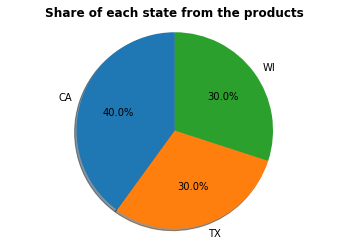

In [20]:
states = sales["state_id"].unique()
print("States: ", states)
states = sales["state_id"].value_counts()
print("States' Statistics: ")
print(states)
pie_chart(sales["state_id"].value_counts(),sales["state_id"].unique(),"Share of each state from the products")

Stores:  ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
Stores' Statistics: 
WI_2    3049
CA_3    3049
WI_1    3049
WI_3    3049
CA_2    3049
TX_1    3049
CA_1    3049
TX_3    3049
TX_2    3049
CA_4    3049
Name: store_id, dtype: int64


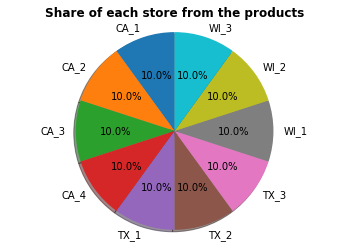

In [21]:
stores = sales["store_id"].unique()
print("Stores: ", stores)
stores = sales["store_id"].value_counts()
print("Stores' Statistics: ")
print(stores)
pie_chart(sales["store_id"].value_counts(),sales["store_id"].unique(),"Share of each store from the products")

Categories:  ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Categories' Statistics: 
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64


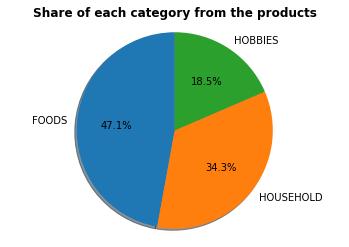

In [22]:
categories = sales["cat_id"].unique()
print("Categories: ", categories)
categories = sales["cat_id"].value_counts()
print("Categories' Statistics: ")
print(categories)
pie_chart(sales["cat_id"].value_counts(),sales["cat_id"].value_counts().index,"Share of each category from the products")

Departments:  ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
Departments' Statistics: 
FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64


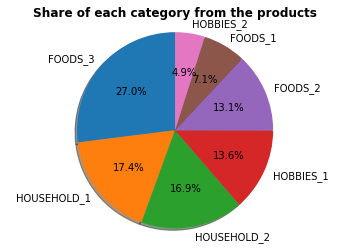

In [23]:
departments = sales["dept_id"].unique()
print("Departments: ", departments)
departments = sales["dept_id"].value_counts()
print("Departments' Statistics: ")
print(departments)
pie_chart(sales["dept_id"].value_counts(),sales["dept_id"].value_counts().index,"Share of each category from the products")

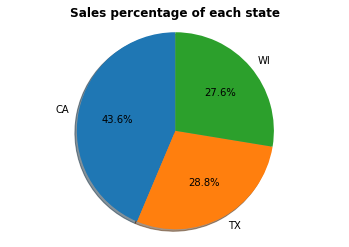

In [24]:
sales['total_sales'] = sales[date].sum(axis=1)
statewise_sales = (sales.groupby('state_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(statewise_sales['total_sales'], statewise_sales['state_id'], "Sales percentage of each state")

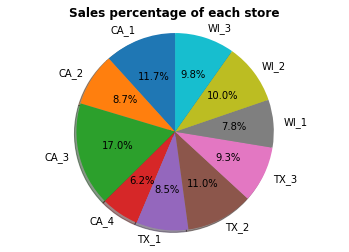

In [25]:
storewise_sales = (sales.groupby('store_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(storewise_sales['total_sales'], storewise_sales['store_id'], "Sales percentage of each store")

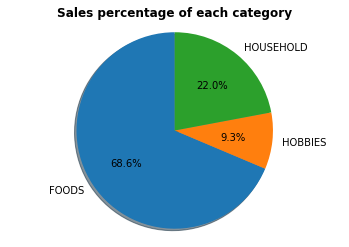

In [26]:
categoryewise_sales = (sales.groupby('cat_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(categoryewise_sales['total_sales'], categoryewise_sales['cat_id'], "Sales percentage of each category")

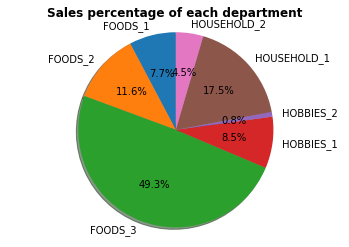

In [27]:
departmentewise_sales = (sales.groupby('dept_id').agg({"total_sales":"sum"})/sales["total_sales"].sum() * 100).reset_index()
pie_chart(departmentewise_sales['total_sales'], departmentewise_sales['dept_id'], "Sales percentage of each department")

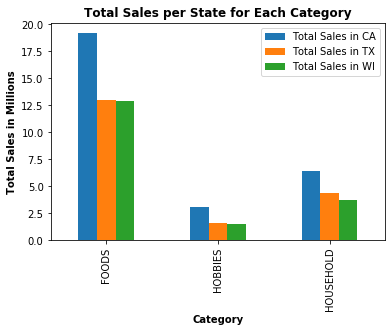

In [28]:
cat_state = sales.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Category.png")

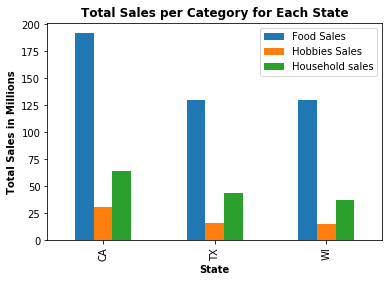

In [29]:
cat_state = sales.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
plt.savefig("Total Sales per Category for each State.png")

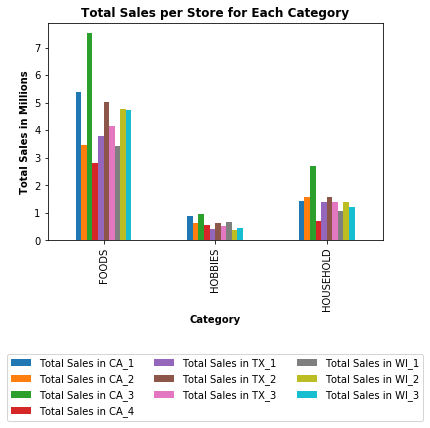

In [30]:
cat_state = sales.groupby(['cat_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Category",fontweight = "bold")
plt.xlabel("Category",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Category.png")

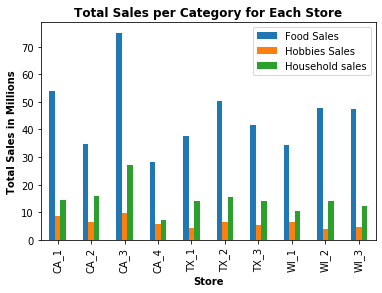

In [31]:
cat_state = sales.groupby(['store_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Category for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food Sales', 'Hobbies Sales','Household sales'])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.savefig("Total Sales per Category for Each Store.png")

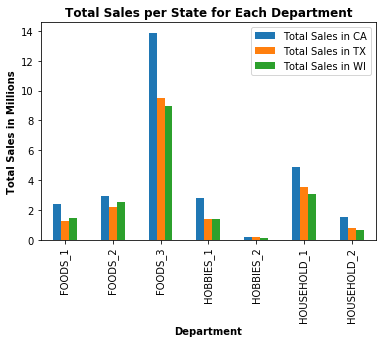

In [32]:
dept_state = sales.groupby(['dept_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/1000000).unstack().plot(kind='bar')
plt.title("Total Sales per State for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA', 'Total Sales in TX','Total Sales in WI'])
plt.savefig("Total Sales per State for Each Department.png")

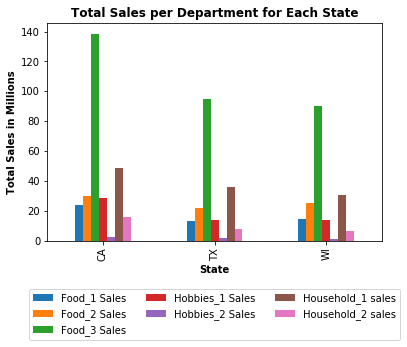

In [33]:
dept_state = sales.groupby(['state_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: x/100000).unstack().plot(kind='bar')
plt.title("Total Sales per Department for Each State",fontweight = "bold")
plt.xlabel("State",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3 )
plt.savefig("Total Sales per Department for each State.png")


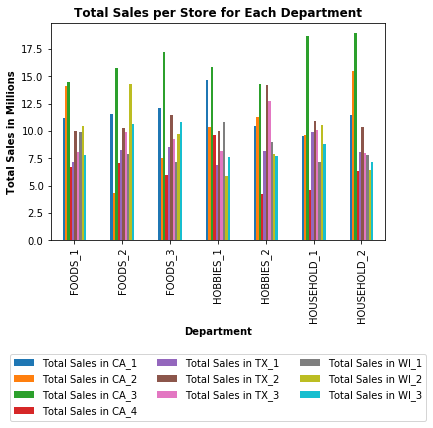

In [34]:
dept_state = sales.groupby(['dept_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar')
plt.title("Total Sales per Store for Each Department",fontweight = "bold")
plt.xlabel("Department",fontweight = "bold")
plt.ylabel("Total Sales in Millions",fontweight = "bold")
plt.legend(labels=['Total Sales in CA_1','Total Sales in CA_2','Total Sales in CA_3','Total Sales in CA_4', 'Total Sales in TX_1', 'Total Sales in TX_2', 'Total Sales in TX_3', 'Total Sales in WI_1', 'Total Sales in WI_2', 'Total Sales in WI_3'], loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
plt.savefig("Total Sales per Store for Each Department.png")

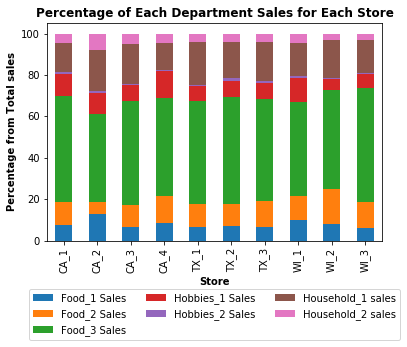

In [35]:
dept_state = sales.groupby(['store_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 *x / float(x.sum())).unstack().plot(kind='bar', stacked = True)
plt.title("Percentage of Each Department Sales for Each Store",fontweight = "bold")
plt.xlabel("Store",fontweight = "bold")
plt.ylabel("Percentage from Total sales",fontweight = "bold")
plt.legend(labels=['Food_1 Sales', 'Food_2 Sales', 'Food_3 Sales', 'Hobbies_1 Sales', 'Hobbies_2 Sales','Household_1 sales', 'Household_2 sales'], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig("Percentage of Each Department Sales for Each Store.png")

In [ ]:
def plot():
    sns.set()
    df_plot = df_time.resample('M').mean()
    plt.plot(df_plot)
    plt.title('Air polution by O3 and PM10')
    plt.ylabel('micrograms per cubic meter (mg/m3)')
    plt.xticks(rotation=45)
    plt.show()
    return

In [69]:
start_date = datetime(2011,1,29)
end_date = datetime(2016,6,19)

In [142]:
sales_ts = pd.DataFrame(sales[date].sum(axis =0),columns = ["total_sales"])
sales_ts['date'] = pd.date_range(start_date, periods=1913).tolist()
sales_ts.set_index('date', drop=True, inplace=True)
sales_ts.head()

,total_sales
date,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146


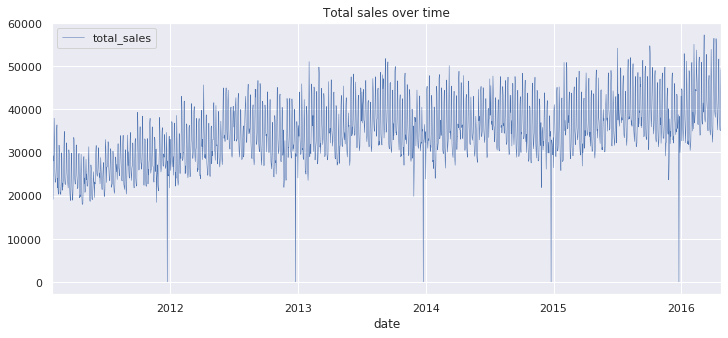

In [143]:
sns.set(rc={'figure.figsize':(12, 5)})
sales_ts.plot(linewidth=0.5)
plt.title("Total sales over time")
plt.savefig("Total sales over time")

In [189]:
events1_dict = {'date': calender['date'],
    'event_name':  calender['event_name_1'],
    'event_type':  calender['event_type_1']} #'date':  pd.to_datetime(calender['date']).apply(lambda x: x.date())
events2_dict = {'date': calender['date'],
    'event_name':  calender['event_name_2'],
    'event_type':  calender['event_type_2']}
events1 = pd.DataFrame(events1_dict).dropna()
events2 = pd.DataFrame(events1_dict).dropna()
# events.append(pd.DataFrame(events2_dict).dropna())#subset=['event_name'])
sales_events1 = pd.merge(sales_ts, events1, on=['date'])
sales_events1.set_index('date', drop=True, inplace=True)
sales_events1.head()

,total_sales,event_name,event_type
date,,,
2011-02-06,32736,SuperBowl,Sporting
2011-02-14,21804,ValentinesDay,Cultural
2011-02-21,23966,PresidentsDay,National
2011-03-09,22560,LentStart,Religious
2011-03-16,22765,LentWeek2,Religious


In [154]:
sales_events2 = pd.merge(sales_ts, events2, on=['date'])
sales_events2.set_index('date', drop=True, inplace=True)
sales_events2.head()

,total_sales,event_name,event_type
date,,,
2011-02-06,32736,SuperBowl,Sporting
2011-02-14,21804,ValentinesDay,Cultural
2011-02-21,23966,PresidentsDay,National
2011-03-09,22560,LentStart,Religious
2011-03-16,22765,LentWeek2,Religious


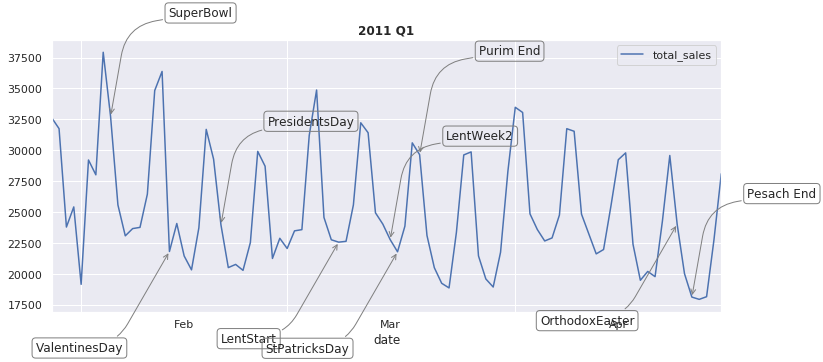

In [275]:
sales_2011 = sales_ts.loc['2011-01-29':'2011-04-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-01-29':'2011-04-30']
sales_events2_2011 = sales_events2.loc['2011-01-29':'2011-04-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q1",fontweight = "bold")
plt.savefig("2011 Q1")

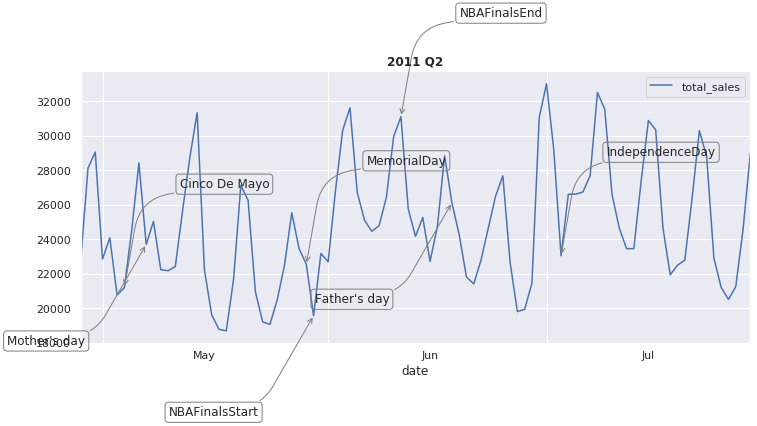

In [276]:
sales_2011 = sales_ts.loc['2011-04-29':'2011-07-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-04-29':'2011-07-30']
sales_events2_2011 = sales_events2.loc['2011-04-29':'2011-07-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2 == 1):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-100, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q2",fontweight = "bold")
plt.savefig("2011 Q2")

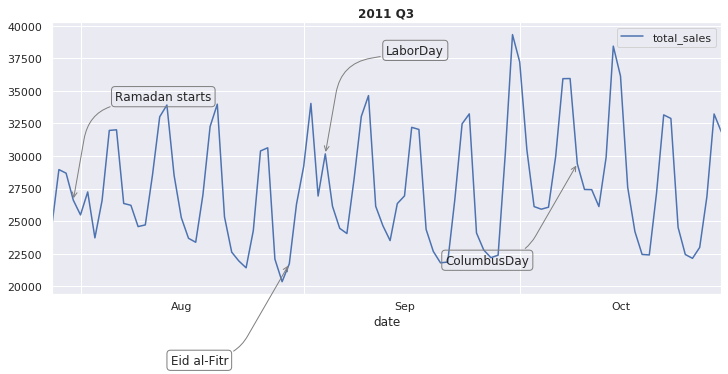

In [279]:
sales_2011 = sales_ts.loc['2011-07-29':'2011-10-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-07-29':'2011-10-30']
sales_events2_2011 = sales_events2.loc['2011-07-29':'2011-10-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q3",fontweight = "bold")
plt.savefig("2011 Q3")

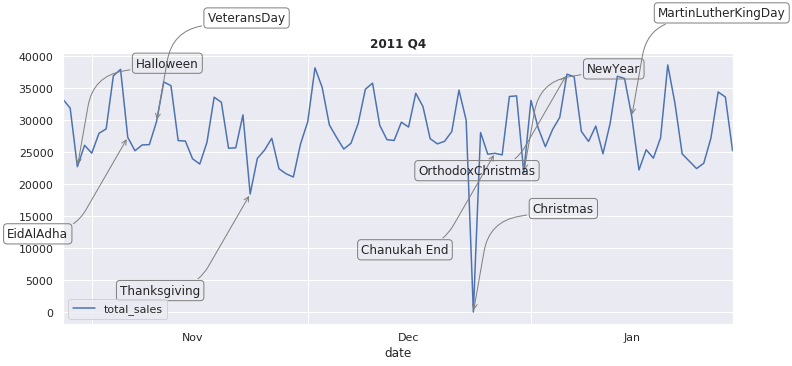

In [280]:
sales_2011 = sales_ts.loc['2011-10-29':'2012-01-30']
#sales_2011.head()
sales_events1_2011 = sales_events1.loc['2011-10-29':'2012-01-30']
sales_events2_2011 = sales_events2.loc['2011-10-29':'2012-01-30']
# sales_events1_2011.index.to_numpy
fig, ax = plt.subplots()
sales_2011.plot(ax = ax)
dates = sales_events1_2011.index.array
for i in range(sales_events1_2011.shape[0]):
    e = sales_events1_2011.iloc[i,:]
    if (i%2):
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-90, -100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=60,rad=20"))
    else:
        ax.annotate(e["event_name"], xy=(dates[i], e["total_sales"]),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(90, 100), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->", color='grey',connectionstyle="angle,angleA=10,angleB=80,rad=30"))
#     ax.text(dates[i], e["total_sales"], e["event_name"], **style)
# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))
plt.title("2011 Q4",fontweight = "bold")
plt.savefig("2011 Q4")

In [ ]:
sell_prices = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

In [ ]:
sell_prices_foods_1_001 = sell_prices.loc[(sell_prices.item_id=='FOODS_1_001') & (sell_prices.store_id == 'CA_1'), :]
sell_prices_foods_1_001_CA1 = sell_prices_foods_1_001.set_index('wm_yr_wk')
sell_prices_foods_1_001_CA1.head()
# sell_prices_foods_1_001.index

In [ ]:
sell_prices_foods_1_001_CA1.plot()
plt.show()

In [ ]:
sales_train_validation = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
sales_train_validation_foods_1_001 = sales_train_validation.loc[sales_train_validation.item_id=='FOODS_1_001', :]
sales_train_validation_foods_1_001.head()
# plt.plot(sales_train_validation, y, color='tab:red')
# plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
# plt.show()
# plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

In [ ]:
date_col = [col for col in sales_train_validation if col.startswith('d_')]
sales_train_validation['total_sales'] = sales_train_validation[date_col].sum(axis=1)
sales_train_validation.groupby('state_id').agg({"total_sales":"sum"}).reset_index()